In [111]:
# Libraries Import
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
#Data Import
df = pd.read_csv("diabetic_data.csv")

In [113]:
# Data Header
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [114]:
#Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [115]:
# Statistical Analyis
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 23.38159722222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Data Points')]

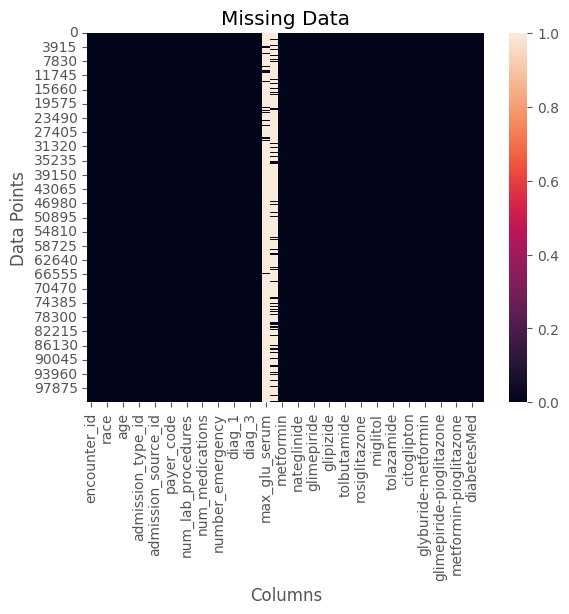

In [116]:
#Missing Data Points
sns.heatmap(df.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [117]:
#names of all features
print(list(df))

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [118]:
#Remove Duplicate Data Points
#df.groupby(['patient_nbr']).count()
df['patient_nbr'].value_counts()

,count
patient_nbr,
88785891,40
43140906,28
1660293,23
88227540,23
23199021,23
...,...
11005362,1
98252496,1
1019673,1


In [119]:
df = df.drop_duplicates(subset=['patient_nbr'])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications           

In [121]:
# Remove Uninformative Features
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']

In [122]:
df.drop(features_drop_list, axis=1,inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   num_lab_procedures        71518 non-null  int64 
 8   num_procedures            71518 non-null  int64 
 9   num_medications           71518 non-null  int64 
 10  number_outpatient         71518 non-null  int64 
 11  number_emergency          71518 non-null  int64 
 12  number_inpatient          71518 non-null  int64 
 13  diag_1                    71518 non-null  object
 14  diag_2                    

In [124]:
Diag Features Fix
#start by setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)


In [125]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
df['diag_1'].loc[(df['diag_1']>=240) & (df['diag_1']< 280)] = 3
df['diag_1'].loc[(df['diag_1']>=280) & (df['diag_1']< 290)] = 4
df['diag_1'].loc[(df['diag_1']>=290) & (df['diag_1']< 320)] = 5
df['diag_1'].loc[(df['diag_1']>=320) & (df['diag_1']< 390)] = 6
df['diag_1'].loc[(df['diag_1']>=390) & (df['diag_1']< 460)] = 7
df['diag_1'].loc[(df['diag_1']>=460) & (df['diag_1']< 520)] = 8
df['diag_1'].loc[(df['diag_1']>=520) & (df['diag_1']< 580)] = 9
df['diag_1'].loc[(df['diag_1']>=580) & (df['diag_1']< 630)] = 10
df['diag_1'].loc[(df['diag_1']>=630) & (df['diag_1']< 680)] = 11
df['diag_1'].loc[(df['diag_1']>=680) & (df['diag_1']< 710)] = 12
df['diag_1'].loc[(df['diag_1']>=710) & (df['diag_1']< 740)] = 13
df['diag_1'].loc[(df['diag_1']>=740) & (df['diag_1']< 760)] = 14
df['diag_1'].loc[(df['diag_1']>=760) & (df['diag_1']< 780)] = 15
df['diag_1'].loc[(df['diag_1']>=780) & (df['diag_1']< 800)] = 16
df['diag_1'].loc[(df['diag_1']>=800) & (df['diag_1']< 1000)] = 17
df['diag_1'].loc[(df['diag_1']==-1)] = 0

df['diag_2'].loc[(df['diag_2']>=1) & (df['diag_2']< 140)] = 1
df['diag_2'].loc[(df['diag_2']>=140) & (df['diag_2']< 240)] = 2
df['diag_2'].loc[(df['diag_2']>=240) & (df['diag_2']< 280)] = 3
df['diag_2'].loc[(df['diag_2']>=280) & (df['diag_2']< 290)] = 4
df['diag_2'].loc[(df['diag_2']>=290) & (df['diag_2']< 320)] = 5
df['diag_2'].loc[(df['diag_2']>=320) & (df['diag_2']< 390)] = 6
df['diag_2'].loc[(df['diag_2']>=390) & (df['diag_2']< 460)] = 7
df['diag_2'].loc[(df['diag_2']>=460) & (df['diag_2']< 520)] = 8
df['diag_2'].loc[(df['diag_2']>=520) & (df['diag_2']< 580)] = 9
df['diag_2'].loc[(df['diag_2']>=580) & (df['diag_2']< 630)] = 10
df['diag_2'].loc[(df['diag_2']>=630) & (df['diag_2']< 680)] = 11
df['diag_2'].loc[(df['diag_2']>=680) & (df['diag_2']< 710)] = 12
df['diag_2'].loc[(df['diag_2']>=710) & (df['diag_2']< 740)] = 13
df['diag_2'].loc[(df['diag_2']>=740) & (df['diag_2']< 760)] = 14
df['diag_2'].loc[(df['diag_2']>=760) & (df['diag_2']< 780)] = 15
df['diag_2'].loc[(df['diag_2']>=780) & (df['diag_2']< 800)] = 16
df['diag_2'].loc[(df['diag_2']>=800) & (df['diag_2']< 1000)] = 17
df['diag_2'].loc[(df['diag_2']==-1)] = 0

df['diag_3'].loc[(df['diag_3']>=1) & (df['diag_3']< 140)] = 1
df['diag_3'].loc[(df['diag_3']>=140) & (df['diag_3']< 240)] = 2
df['diag_3'].loc[(df['diag_3']>=240) & (df['diag_3']< 280)] = 3
df['diag_3'].loc[(df['diag_3']>=280) & (df['diag_3']< 290)] = 4
df['diag_3'].loc[(df['diag_3']>=290) & (df['diag_3']< 320)] = 5
df['diag_3'].loc[(df['diag_3']>=320) & (df['diag_3']< 390)] = 6
df['diag_3'].loc[(df['diag_3']>=390) & (df['diag_3']< 460)] = 7
df['diag_3'].loc[(df['diag_3']>=460) & (df['diag_3']< 520)] = 8
df['diag_3'].loc[(df['diag_3']>=520) & (df['diag_3']< 580)] = 9
df['diag_3'].loc[(df['diag_3']>=580) & (df['diag_3']< 630)] = 10
df['diag_3'].loc[(df['diag_3']>=630) & (df['diag_3']< 680)] = 11
df['diag_3'].loc[(df['diag_3']>=680) & (df['diag_3']< 710)] = 12
df['diag_3'].loc[(df['diag_3']>=710) & (df['diag_3']< 740)] = 13
df['diag_3'].loc[(df['diag_3']>=740) & (df['diag_3']< 760)] = 14
df['diag_3'].loc[(df['diag_3']>=760) & (df['diag_3']< 780)] = 15
df['diag_3'].loc[(df['diag_3']>=780) & (df['diag_3']< 800)] = 16
df['diag_3'].loc[(df['diag_3']>=800) & (df['diag_3']< 1000)] = 17
df['diag_3'].loc[(df['diag_3']==-1)] = 0

<ipython-input-125-324d3de206fe>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
<ipython-input-125-324d3de206fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [126]:
#check the results
df.diag_1.unique()

array([ 3., 11.,  1.,  2.,  7.,  8., 17., 12., 13.,  9.,  0., 16., 10.,
        5.,  6.,  4., 14.])

In [127]:
#Race Feature Fix
df['race'] = df['race'].replace('?', 'Other')

In [128]:
df.race.value_counts()

,count
race,
Caucasian,53491
AfricanAmerican,12887
Other,3126
Hispanic,1517
Asian,497


In [129]:
# Gender Feature Fix
df.gender.value_counts()

,count
gender,
Female,38025
Male,33490
Unknown/Invalid,3


In [130]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')
df.gender.value_counts()

,count
gender,
Female,38028
Male,33490


In [131]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df.gender.value_counts()

<ipython-input-131-4fb992ba60dc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)


,count
gender,
0,38028
1,33490


In [132]:
#Age Feature Fix
df.age.value_counts()

,count
age,
[70-80),18210
[60-70),15960
[50-60),12466
[80-90),11589
[40-50),6878
[30-40),2699
[90-100),1900
[20-30),1127
[10-20),535


In [133]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)
df['age'].value_counts()

<ipython-input-133-a36a3553f0a5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)


,count
age,
75,18210
65,15960
55,12466
85,11589
45,6878
35,2699
95,1900
25,1127
15,535


In [134]:
#max  glue Serum Feature Fix
df.max_glu_serum.value_counts()

,count
max_glu_serum,
Norm,1731
>200,969
>300,756


In [135]:
df['max_glu_serum']=df['max_glu_serum'].replace("None", 0)
df['max_glu_serum']=df['max_glu_serum'].replace("Norm", 1)
df['max_glu_serum']=df['max_glu_serum'].replace(">200", 2)
df['max_glu_serum']=df['max_glu_serum'].replace(">300", 3)
df.max_glu_serum.value_counts()

<ipython-input-135-fc0606e29f96>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum']=df['max_glu_serum'].replace(">300", 3)


,count
max_glu_serum,
1.0,1731
2.0,969
3.0,756


In [136]:
#A1 Cresult Feature Fix
df.A1Cresult.value_counts()

,count
A1Cresult,
>8,6304
Norm,3791
>7,2891


In [137]:
df['A1Cresult']=df['A1Cresult'].replace("None", 0)
df['A1Cresult']=df['A1Cresult'].replace("Norm", 1)
df['A1Cresult']=df['A1Cresult'].replace(">7", 2)
df['A1Cresult']=df['A1Cresult'].replace(">8", 3)

<ipython-input-137-7e7a9f829f91>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult']=df['A1Cresult'].replace(">8", 3)


In [138]:
df.A1Cresult.value_counts()

,count
A1Cresult,
3.0,6304
1.0,3791
2.0,2891


In [139]:
#Drugs Features Fix
#df.metformin.value_counts()
#df.glimepiride.value_counts()
#df.glipizide.value_counts()
#df.glyburide.value_counts()
#df.pioglitazone.value_counts()
#df.rosiglitazone.value_counts()
df.insulin.value_counts()

,count
insulin,
No,34921
Steady,22129
Down,7505
Up,6963


In [140]:
drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for i in drug_list:
    df[i] = df[i].replace('No', 0)
    df[i] = df[i].replace('Steady', 2)
    df[i] = df[i].replace('Down', 1)
    df[i] = df[i].replace('Up', 3)

<ipython-input-140-965d4a98c3ef>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace('Up', 3)


In [141]:
#df.metformin.value_counts()
#df.glimepiride.value_counts()
#df.glipizide.value_counts()
#df.glyburide.value_counts()
#df.pioglitazone.value_counts()
#df.rosiglitazone.value_counts()
df.insulin.value_counts()

,count
insulin,
0,34921
2,22129
1,7505
3,6963


In [142]:
#Change Feature Fix
df.change.value_counts()

,count
change,
No,39494
Ch,32024


In [143]:
df['change']=df['change'].replace('No', 0)
df['change']=df['change'].replace('Ch', 1)
df.change.value_counts()

<ipython-input-143-52b8d883ac65>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change']=df['change'].replace('Ch', 1)


,count
change,
0,39494
1,32024


In [144]:
# DiabetesMed Feture Fix
df.diabetesMed.value_counts()

,count
diabetesMed,
Yes,54319
No,17199


In [145]:
df['diabetesMed']=df['diabetesMed'].replace('Yes', 1)
df['diabetesMed']=df['diabetesMed'].replace('No', 0)
df.diabetesMed.value_counts()

<ipython-input-145-afec8adf5c96>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetesMed']=df['diabetesMed'].replace('No', 0)


,count
diabetesMed,
1,54319
0,17199


In [146]:
#Target Feature Fix
df.readmitted.value_counts()

,count
readmitted,
NO,42985
>30,22240
<30,6293


In [147]:
df['readmitted']=df['readmitted'].replace('NO', 0)
df['readmitted']=df['readmitted'].replace('>30', 1)
df['readmitted']=df['readmitted'].replace('<30', 2)
df.readmitted.value_counts()

<ipython-input-147-956e49679c24>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted']=df['readmitted'].replace('<30', 2)


,count
readmitted,
0,42985
1,22240
2,6293


In [148]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71518 non-null  object 
 1   gender                    71518 non-null  int64  
 2   age                       71518 non-null  int64  
 3   admission_type_id         71518 non-null  int64  
 4   discharge_disposition_id  71518 non-null  int64  
 5   admission_source_id       71518 non-null  int64  
 6   time_in_hospital          71518 non-null  int64  
 7   num_lab_procedures        71518 non-null  int64  
 8   num_procedures            71518 non-null  int64  
 9   num_medications           71518 non-null  int64  
 10  number_outpatient         71518 non-null  int64  
 11  number_emergency          71518 non-null  int64  
 12  number_inpatient          71518 non-null  int64  
 13  diag_1                    71518 non-null  float64
 14  diag_2    

Non-numeric columns: Index(['race'], dtype='object')


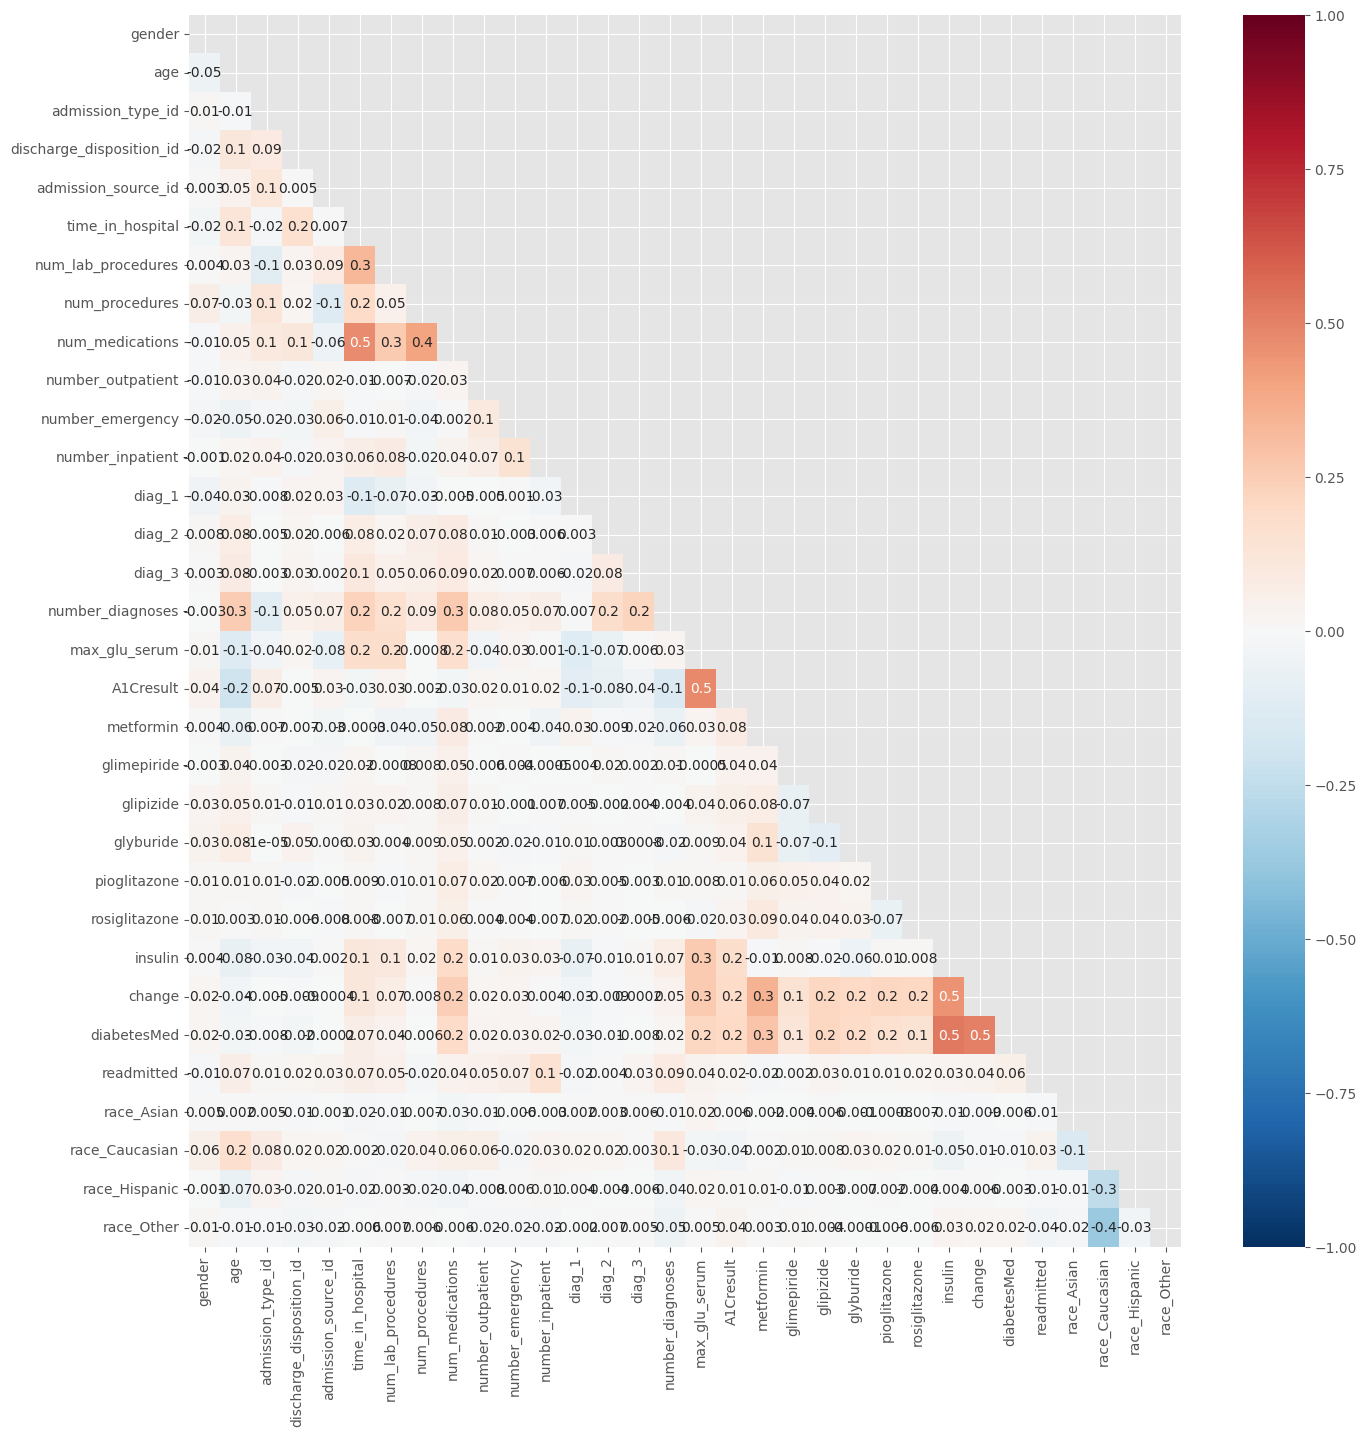

In [149]:
# Correlation Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined

# Step 1: Check for non-numeric columns
print("Non-numeric columns:", df.select_dtypes(exclude=[np.number]).columns)

# Step 2: Encode or drop non-numeric columns
# If the non-numeric columns are categorical and need encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Compute correlation matrix
matrix = np.triu(df_encoded.corr())

# Step 4: Plot the heatmap
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df_encoded.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center=0, mask=matrix, cmap='RdBu_r')
plt.show()


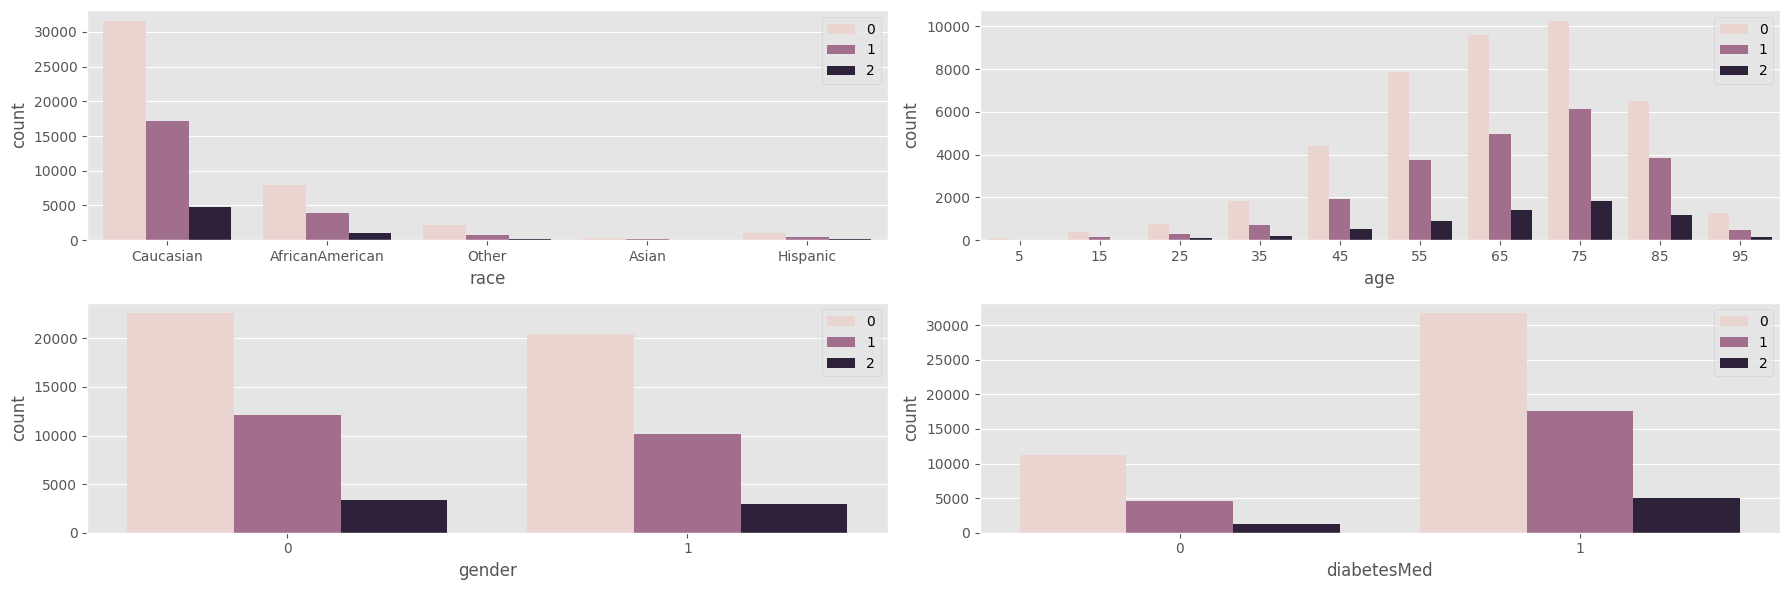

In [150]:
#Patient Analysis

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='race', hue='readmitted', ax=ax1)
sns.countplot(data=df, x='age', hue='readmitted', ax=ax2)
sns.countplot(data=df, x='gender', hue='readmitted', ax=ax3)
sns.countplot(data=df, x='diabetesMed', hue='readmitted', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()
# readmitted: 0 = No, 1 = >30, 2 = <30

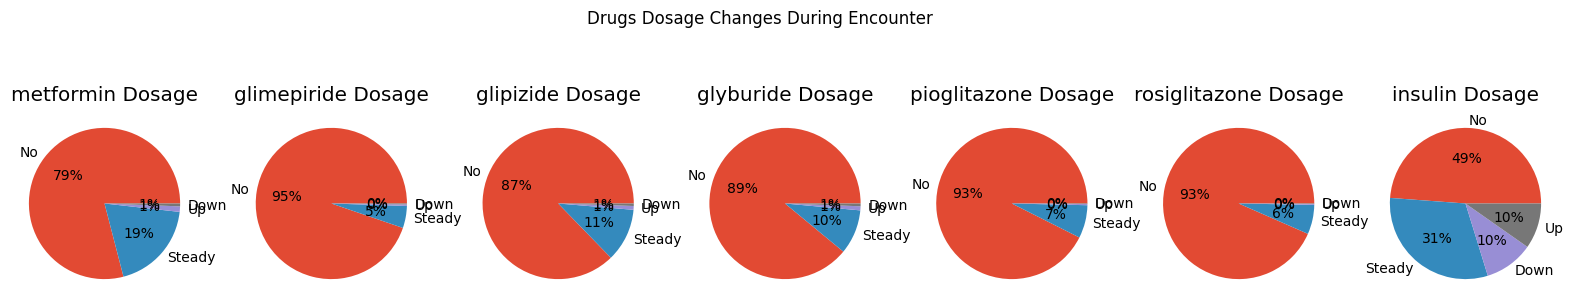

In [151]:
#Drug Analysis
fig, ax = plt.subplots(1, 7,figsize=(20, 4), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['metformin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[0].set_title('metformin Dosage')
ax[1].pie(df['glimepiride'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[1].set_title('glimepiride Dosage')
ax[2].pie(df['glipizide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[2].set_title('glipizide Dosage')
ax[3].pie(df['glyburide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[3].set_title('glyburide Dosage')
ax[4].pie(df['pioglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[4].set_title('pioglitazone Dosage')
ax[5].pie(df['rosiglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[5].set_title('rosiglitazone Dosage')
ax[6].pie(df['insulin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Down', 'Up'])
ax[6].set_title('insulin Dosage')

fig.suptitle('Drugs Dosage Changes During Encounter')
plt.show()

<ipython-input-152-27c60f86bad3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='No readmittion')
<ipython-input-152-27c60f86bad3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmittion in >30 days')
<ipython-input-152-27c60f86bad3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 2),'time_in_hospital'] , color='y',shade=True, label='Readmitted in <30 days')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

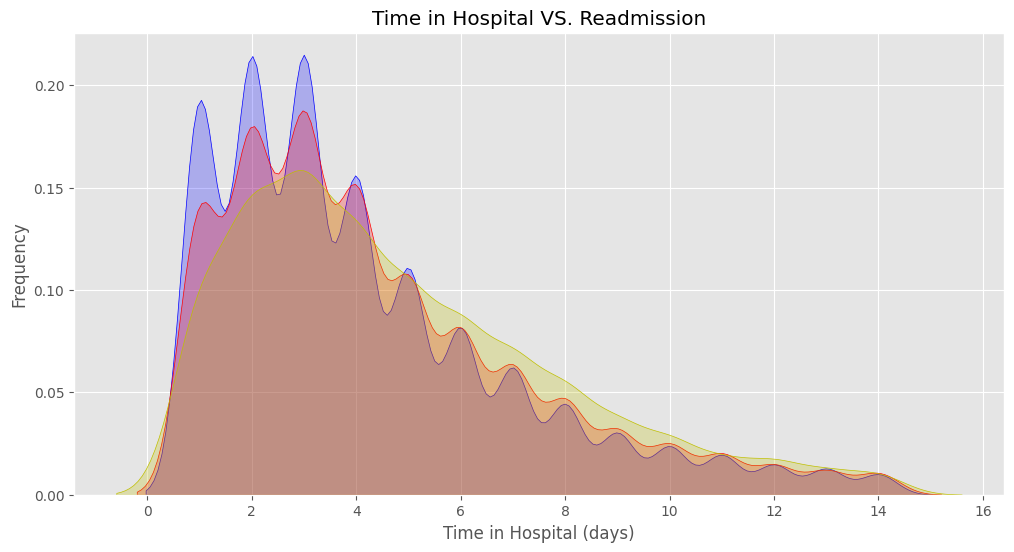

In [152]:
#Except of insulin, the other drugs have very similar distripution.
#Time in Hospital and Readmission
fig = plt.figure(figsize=(12,6))
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='No readmittion')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmittion in >30 days')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 2),'time_in_hospital'] , color='y',shade=True, label='Readmitted in <30 days')
ax.set(xlabel='Time in Hospital (days)', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [153]:
# Data Preprocessing
#Race Feature Encoding

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71518 non-null  object 
 1   gender                    71518 non-null  int64  
 2   age                       71518 non-null  int64  
 3   admission_type_id         71518 non-null  int64  
 4   discharge_disposition_id  71518 non-null  int64  
 5   admission_source_id       71518 non-null  int64  
 6   time_in_hospital          71518 non-null  int64  
 7   num_lab_procedures        71518 non-null  int64  
 8   num_procedures            71518 non-null  int64  
 9   num_medications           71518 non-null  int64  
 10  number_outpatient         71518 non-null  int64  
 11  number_emergency          71518 non-null  int64  
 12  number_inpatient          71518 non-null  int64  
 13  diag_1                    71518 non-null  float64
 14  diag_2    

In [154]:
df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')], axis=1).drop(['race'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    71518 non-null  int64  
 1   age                       71518 non-null  int64  
 2   admission_type_id         71518 non-null  int64  
 3   discharge_disposition_id  71518 non-null  int64  
 4   admission_source_id       71518 non-null  int64  
 5   time_in_hospital          71518 non-null  int64  
 6   num_lab_procedures        71518 non-null  int64  
 7   num_procedures            71518 non-null  int64  
 8   num_medications           71518 non-null  int64  
 9   number_outpatient         71518 non-null  int64  
 10  number_emergency          71518 non-null  int64  
 11  number_inpatient          71518 non-null  int64  
 12  diag_1                    71518 non-null  float64
 13  diag_2                    71518 non-null  float64
 14  diag_3    

In [155]:
# Here I have split the Data
y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

In [156]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [157]:
#Data Scalling
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

In [158]:
#Model Building

#We will be testing a set of different classifiers, then we will pick the one with best performance, and apply hyperparameter
#tuning to improve its performance. The following classifiers are used:

#Naive Bayes
#KNN
#SVM
#Random Forest
#Gradient Boosting


# Initial Build
from sklearn.impute import SimpleImputer

# Step 1: Check for missing values
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_val:", X_val.isnull().sum().sum())

# Step 2: Handle missing values (using mean imputation as an example)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

Xsc_train_imputed = imputer.fit_transform(Xsc_train)
Xsc_val_imputed = imputer.transform(Xsc_val)

# Naive Bayes
nbm = GaussianNB()
nbm.fit(X_train_imputed, y_train)
nbm_pred = nbm.predict(X_val_imputed)

# KNN
knn = KNeighborsClassifier()
knn.fit(Xsc_train_imputed, y_train)
knn_pred = knn.predict(Xsc_val_imputed)

# SVM
svm = SVC()
svm.fit(Xsc_train_imputed, y_train)
svm_pred = svm.predict(Xsc_val_imputed)

# Random Forest
rfm = RandomForestClassifier()
rfm.fit(X_train_imputed, y_train)
rfm_pred = rfm.predict(X_val_imputed)

# Gradient Boosting
gbm = GradientBoostingClassifier()
gbm.fit(X_train_imputed, y_train)
gbm_pred = gbm.predict(X_val_imputed)


Missing values in X_train: 88495
Missing values in X_val: 19084


In [159]:
#Results
print('\nGaussian Naive Bayes Performance:')
print('---------------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

print('\nK-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

print('\nSVM Initial Performance:')
print('------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

print('\nRandom Forest initial Performance:')
print('----------------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

print('\nGradient Boost initial Performance:')
print('-----------------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, gbm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))


Gaussian Naive Bayes Performance:
---------------------------------
F1 Score        :  0.578392990305742
Confusion Matrix:
  [[5271  957  173]
 [2393  847  150]
 [ 620  230   87]]

K-Nearest Neighbor Initial Performance:
---------------------------------------
F1 Score        :  0.5637583892617449
Confusion Matrix:
  [[5214 1148   39]
 [2532  820   38]
 [ 706  217   14]]

SVM Initial Performance:
------------------------
F1 Score        :  0.6073825503355704
Confusion Matrix:
  [[6166  233    2]
 [3038  349    3]
 [ 823  113    1]]

Random Forest initial Performance:
----------------------------------
F1 Score        :  0.6078486204325131
Confusion Matrix:
  [[5857  543    1]
 [2733  657    0]
 [ 743  187    7]]

Gradient Boost initial Performance:
-----------------------------------
F1 Score        :  0.6097129008202834
Confusion Matrix:
  [[6037  357    7]
 [2889  493    8]
 [ 770  156   11]]


In [160]:
#Gradiant Boosting Model Tuning
#define a list that has all feature names
predictors = [x for x in X_train.columns]


Gradient Boost [0] Performance:
-----------------------------------
F1 Score micro        :  0.6097129008202834
F1 Score macro        :  0.3324059142899317
Confusion Matrix:
 [[6037  357    7]
 [2889  493    8]
 [ 770  156   11]]


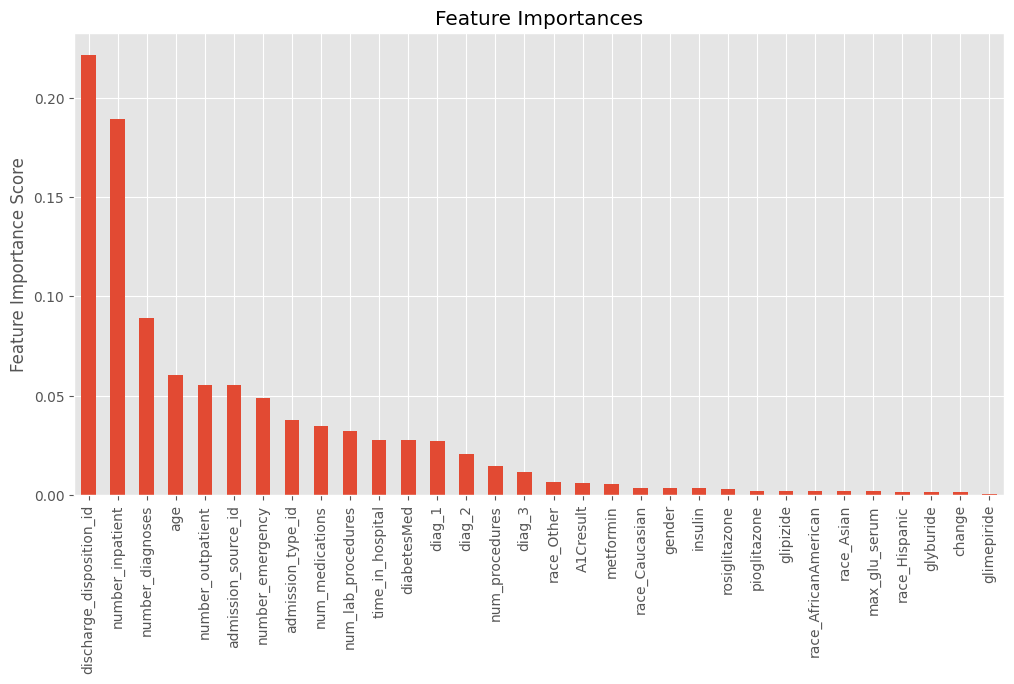

In [161]:
#Now, let's evaluate Baseline (default) GBM
from sklearn.impute import SimpleImputer

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Step 2: Fit Gradient Boosting Classifier
gbm0 = GradientBoostingClassifier()
gbm0.fit(X_train_imputed, y_train)
gbm0_pred = gbm0.predict(X_val_imputed)

# Step 3: Evaluate performance
print('\nGradient Boost [0] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', metrics.f1_score(y_val, gbm0_pred, average='micro'))
print('F1 Score macro        : ', metrics.f1_score(y_val, gbm0_pred, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_val, gbm0_pred))

# Step 4: Feature Importances
predictors = X_train.columns  # Ensure predictors match the column names in X_train
feat_imp = pd.Series(gbm0.feature_importances_, index=predictors).sort_values(ascending=False)

# Step 5: Plot feature importances
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()


In [165]:
#Hyperparameter Tunnning
#Step 1 - Find the number of estimators for a high learning rate
#1.0 - Grid seach on n_estimators

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Choose strategy based on the dataset
X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = y_train  # No imputation required for target

# Step 2: Define parameter grid
param_test1 = {'n_estimators': range(20, 81, 10)}

# Step 3: Initialize and fit GridSearchCV
gsearch1 = GridSearchCV(
    estimator=GradientBoostingClassifier(
        learning_rate=0.1,
        min_samples_split=400,
        min_samples_leaf=50,
        max_depth=8,
        max_features='sqrt',
        subsample=0.8,
        random_state=101
    ),
    param_grid=param_test1,
    scoring='f1_micro',
    n_jobs=4,
    cv=5
)

gsearch1.fit(X_train_imputed, y_train_imputed)

# Step 4: Results
print("Best Parameters:", gsearch1.best_params_)
print("Best Score:", gsearch1.best_score_)


Best Parameters: {'n_estimators': 80}
Best Score: 0.6211298484163954


In [168]:
#Step 2 - Tune tree-specific parameters
#2.1 - Grid seach on max_depth and min_samples_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaN with column mean
X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = y_train  # Assuming no missing values in target

# Step 2: Define parameter grid
param_test2 = {'max_depth': range(3, 16, 3), 'min_samples_split': range(200, 1001, 200)}

# Step 3: Initialize GridSearchCV
gsearch2 = GridSearchCV(
    estimator=GradientBoostingClassifier(
        learning_rate=0.1,
        n_estimators=70,
        max_features='sqrt',
        subsample=0.8,
        random_state=101
    ),
    param_grid=param_test2,
    scoring='f1_micro',
    n_jobs=4,
    cv=5
)

# Step 4: Fit the model
gsearch2.fit(X_train_imputed, y_train_imputed)

# Step 5: Display results
print("Best Parameters:", gsearch2.best_params_)
print("Best Score:", gsearch2.best_score_)


Best Parameters: {'max_depth': 9, 'min_samples_split': 400}
Best Score: 0.6201111088545338


In [171]:

#2.2 - Grid seach on min_samples_leaf
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Assuming X_train and y_train are your training data and target
# Define the imputer to replace NaNs with the mean value of each column
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that first imputes missing values and then fits the model
pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', GradientBoostingClassifier())
])

# Define your parameter grid for GridSearchCV (adjust as needed)
param_grid = {
    'classifier__n_estimators': [50, 100],  # Number of trees
    'classifier__learning_rate': [0.05, 0.1]  # Learning rate
}

# Create GridSearchCV object with the pipeline
gsearch3 = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model
gsearch3.fit(X_train, y_train)

# Display results
print(f"Best parameters: {gsearch3.best_params_}")
print(f"Best score: {gsearch3.best_score_}")


Best parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Best score: 0.618313318135884


In [174]:
# 2.3 Grid seach on max_features
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the imputer to replace NaNs with the mean value of each column
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that first imputes missing values and then fits the model
pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', GradientBoostingClassifier(
        learning_rate=0.1,
        n_estimators=70,
        max_depth=12,
        min_samples_split=800,
        min_samples_leaf=70,
        subsample=0.8,
        random_state=101
    ))
])

# Define the parameter grid for max_features
param_test4 = {'classifier__max_features': range(4, 20, 2)}

# Create GridSearchCV object with the pipeline
gsearch4 = GridSearchCV(
    estimator=pipeline,
    param_grid=param_test4,
    scoring='f1_micro',
    n_jobs=4,
    cv=5
)

# Fit the model
gsearch4.fit(X_train, y_train)

# Optionally print the best parameters and score
print(f"Best parameters: {gsearch4.best_params_}")
print(f"Best score: {gsearch4.best_score_}")


Best parameters: {'classifier__max_features': 16}
Best score: 0.6214894488543241


In [176]:
#The best parameter values so far:
gsearch4.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier',
                 GradientBoostingClassifier(max_depth=12, max_features=16,
                                            min_samples_leaf=70,
                                            min_samples_split=800,
                                            n_estimators=70, random_state=101,
                                            subsample=0.8))])


Gradient Boost [1] Performance:
-----------------------------------
F1 Score micro        :  0.6131618195376585
F1 Score macro        :  0.36503259650118314
Confusion Matrix:
  [[5803  588   10]
 [2629  754    7]
 [ 705  211   21]]


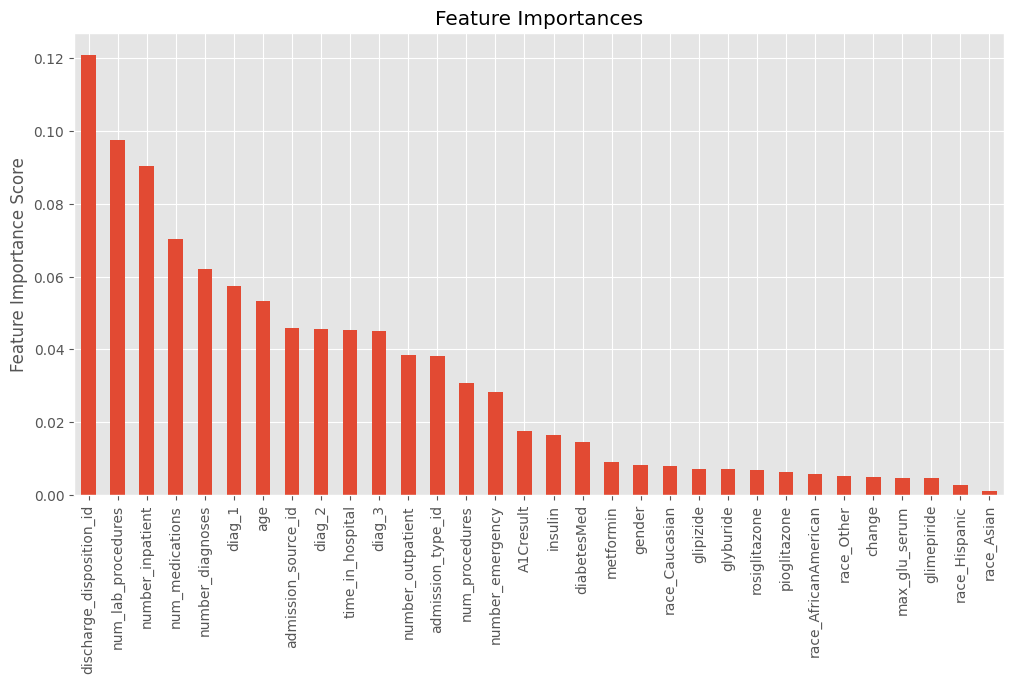

In [180]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Impute missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Now, fit the GradientBoostingClassifier
gbm1 = GradientBoostingClassifier(
    max_depth=12,
    max_features=18,
    min_samples_leaf=70,
    min_samples_split=800,
    n_estimators=70,
    random_state=101,
    subsample=0.8
)

# Fit the model with imputed data
gbm1.fit(X_train_imputed, y_train)
gbm1_pred = gbm1.predict(X_val_imputed)

# Print performance metrics
print('\nGradient Boost [1] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_val, gbm1_pred, average='micro'))
print('F1 Score macro        : ', f1_score(y_val, gbm1_pred, average='macro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm1_pred))

# Feature importance plot
feat_imp = pd.Series(gbm1.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()


In [184]:
#3.1 Grid seach on subsample
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Impute missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Grid search on subsample
param_test5 = {'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1]}

gsearch5 = GridSearchCV(
    estimator=GradientBoostingClassifier(
        learning_rate=0.1,
        n_estimators=70,
        max_depth=12,
        min_samples_split=800,
        min_samples_leaf=70,
        random_state=101,
        max_features=18
    ),
    param_grid=param_test5,
    scoring='f1_micro',
    n_jobs=4,
    cv=5
)

# Fit the model with imputed data
gsearch5.fit(X_train_imputed, y_train)

# Optionally print the best parameters and score
print(f"Best parameters: {gsearch5.best_params_}")
print(f"Best score: {gsearch5.best_score_}")


Best parameters: {'subsample': 0.8}
Best score: 0.6199313425507288



Gradient Boost [2] Performance:
-----------------------------------
F1 Score micro        :  0.5869686800894854
F1 Score macro        :  0.38199486379317765
Confusion Matrix:
  [[5258 1068   75]
 [2336  995   59]
 [ 619  274   44]]


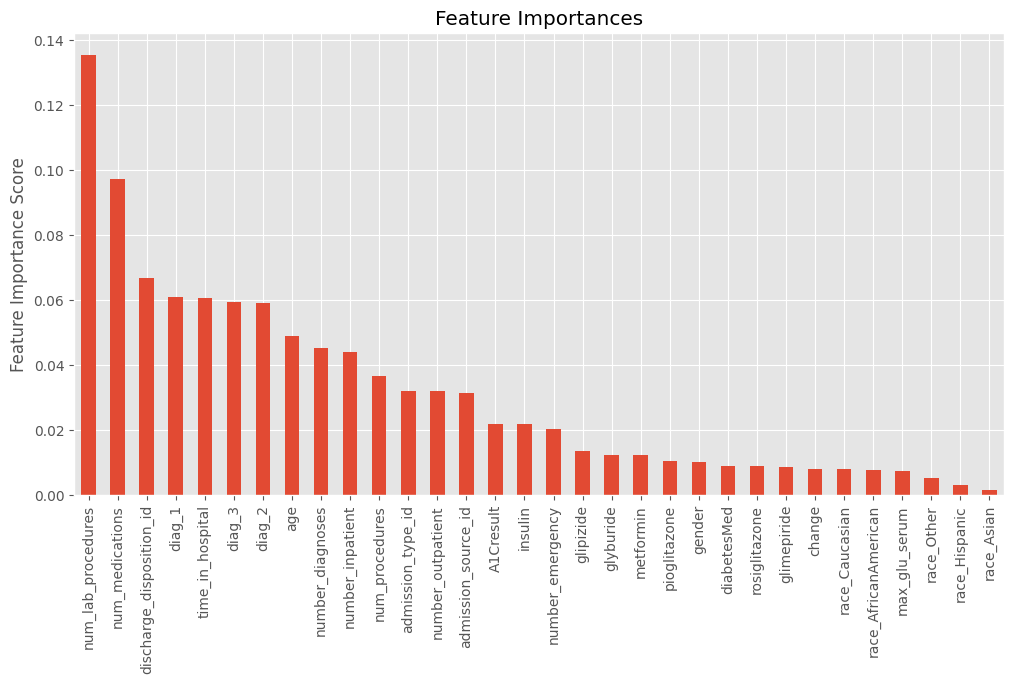

In [186]:
#3.2 reducing the learning rate and proportionally increasing the number of estimators
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Impute missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Train the model with imputed data
gbm2 = GradientBoostingClassifier(
    max_depth=12,
    max_features=18,
    min_samples_leaf=70,
    min_samples_split=800,
    n_estimators=700,
    random_state=101,
    subsample=0.85,
    learning_rate=0.1
)

gbm2.fit(X_train_imputed, y_train)
gbm2_pred = gbm2.predict(X_val_imputed)

# Performance metrics
print('\nGradient Boost [2] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_val, gbm2_pred, average='micro'))
print('F1 Score macro        : ', f1_score(y_val, gbm2_pred, average='macro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm2_pred))

# Feature importance plot
feat_imp = pd.Series(gbm2.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()



Gradient Boost [3] Performance:
-----------------------------------
F1 Score micro        :  0.6153989560029829
F1 Score macro        :  0.3663895046325652
Confusion Matrix:
  [[5838  557    6]
 [2640  741    9]
 [ 714  200   23]]


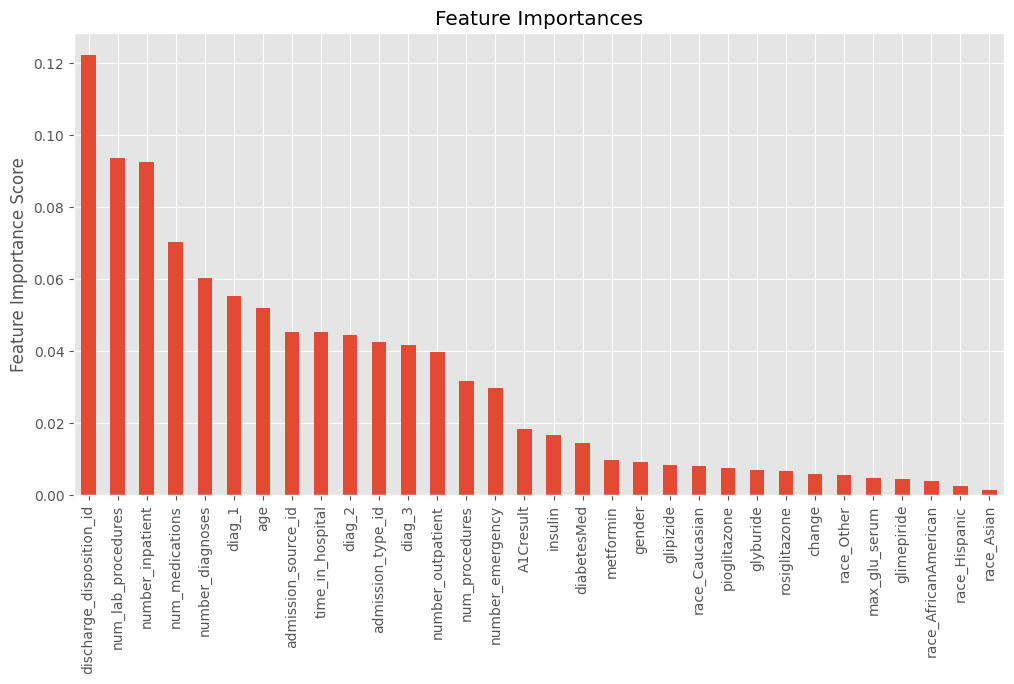

In [188]:
#3.3 reducing the learning rate to 50% and proportionally increasing the number of estimators
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Impute missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Train the model with imputed data
gbm3 = GradientBoostingClassifier(
    max_depth=12,
    max_features=18,
    min_samples_leaf=70,
    min_samples_split=800,
    n_estimators=140,
    random_state=101,
    subsample=0.85,
    learning_rate=0.05
)

gbm3.fit(X_train_imputed, y_train)
gbm3_pred = gbm3.predict(X_val_imputed)

# Performance metrics
print('\nGradient Boost [3] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_val, gbm3_pred, average='micro'))
print('F1 Score macro        : ', f1_score(y_val, gbm3_pred, average='macro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm3_pred))

# Feature importance plot
feat_imp = pd.Series(gbm3.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()



Gradient Boost [4] Performance:
-----------------------------------
F1 Score micro        :  0.6152125279642058
F1 Score macro        :  0.36426491708787617
Confusion Matrix:
  [[5840  556    5]
 [2644  740    6]
 [ 713  204   20]]


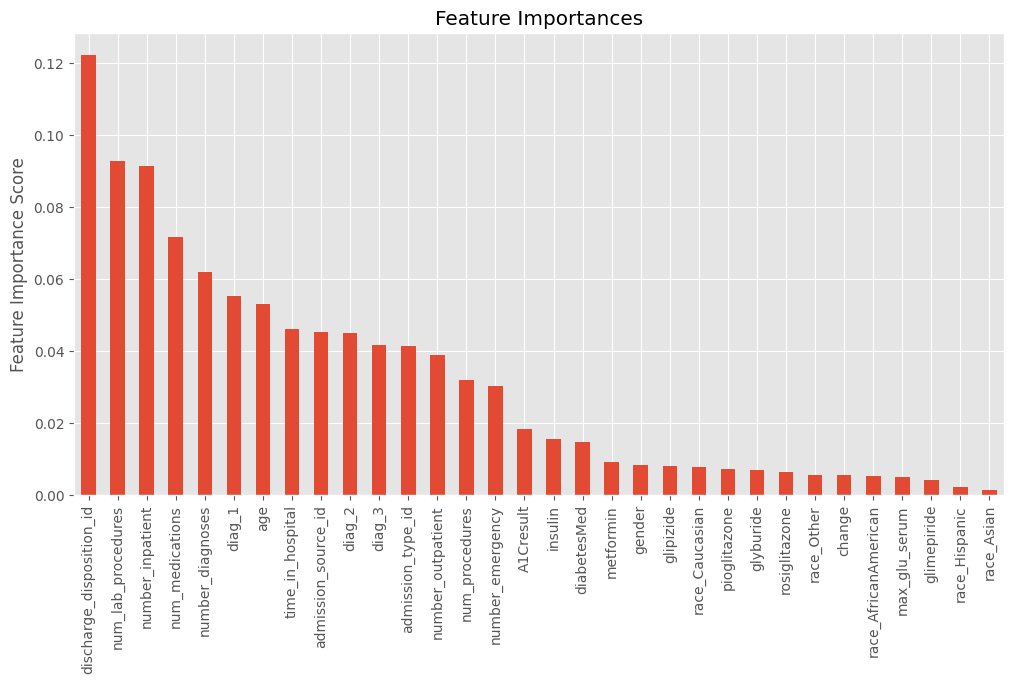

In [190]:
#3.4 reducing the learning rate to 10% and proportionally increasing the number of estimators
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Impute missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Train the model with imputed data
gbm4 = GradientBoostingClassifier(
    max_depth=12,
    max_features=18,
    min_samples_leaf=70,
    min_samples_split=800,
    n_estimators=700,
    random_state=101,
    subsample=0.85,
    learning_rate=0.01
)

gbm4.fit(X_train_imputed, y_train)
gbm4_pred = gbm4.predict(X_val_imputed)

# Performance metrics
print('\nGradient Boost [4] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_val, gbm4_pred, average='micro'))
print('F1 Score macro        : ', f1_score(y_val, gbm4_pred, average='macro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm4_pred))

# Feature importance plot
feat_imp = pd.Series(gbm4.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()



Gradient Boost [5] Performance:
-----------------------------------
F1 Score micro        :  0.6152125279642058
F1 Score macro        :  0.36316323565064534
Confusion Matrix:
  [[5840  556    5]
 [2642  742    6]
 [ 719  200   18]]


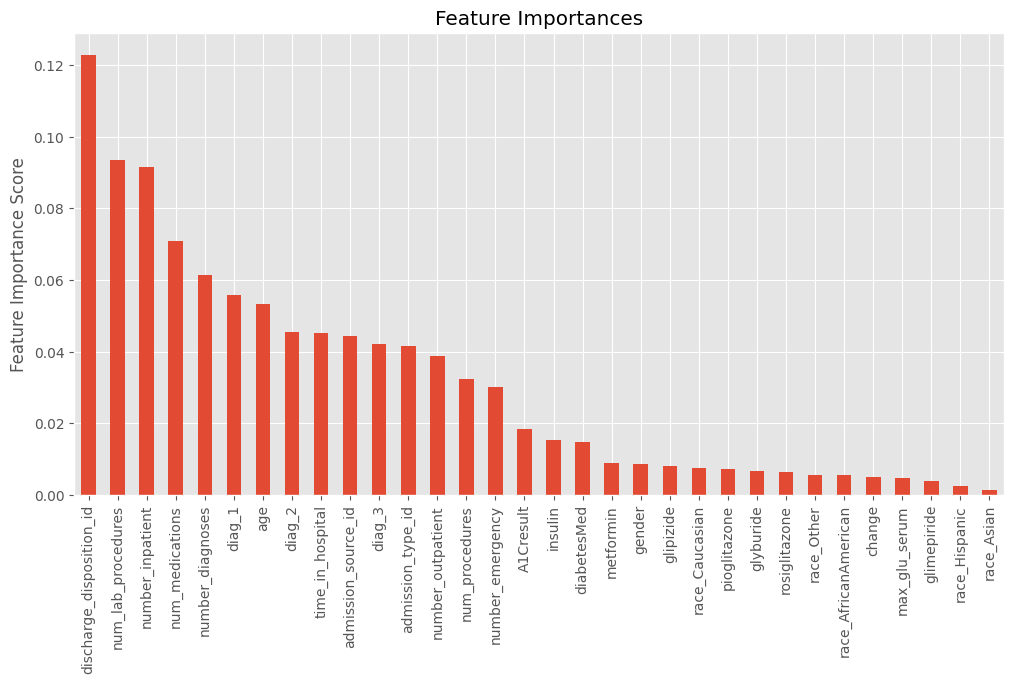

In [192]:
#3.5 reducing the learning rate to 5% and proportionally increasing the number of estimators
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Impute missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Train the model with imputed data
gbm5 = GradientBoostingClassifier(
    max_depth=12,
    max_features=18,
    min_samples_leaf=70,
    min_samples_split=800,
    n_estimators=1400,
    random_state=101,
    subsample=0.85,
    learning_rate=0.005
)

gbm5.fit(X_train_imputed, y_train)
gbm5_pred = gbm5.predict(X_val_imputed)

# Performance metrics
print('\nGradient Boost [5] Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', f1_score(y_val, gbm5_pred, average='micro'))
print('F1 Score macro        : ', f1_score(y_val, gbm5_pred, average='macro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm5_pred))

# Feature importance plot
feat_imp = pd.Series(gbm5.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()



Gradient Boost Final Performance:
-----------------------------------
F1 Score micro        :  0.6230425055928411
F1 Score macro        :  0.3623183375231345
Confusion Matrix:
  [[5913  539    4]
 [2568  763    5]
 [ 717  211    8]]


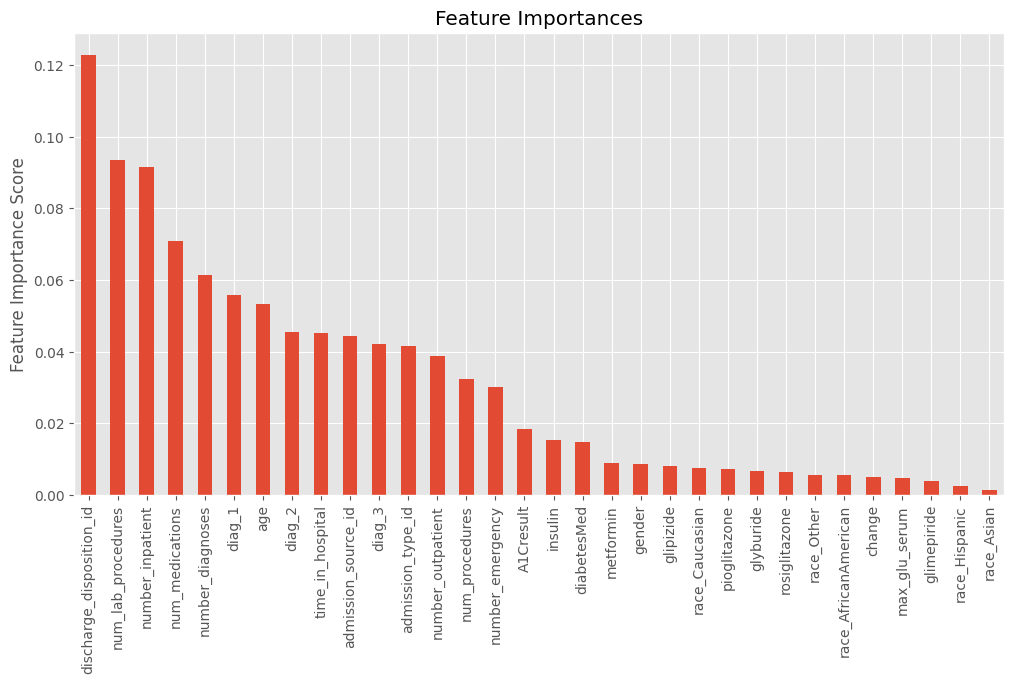

In [194]:
# Final Performance on test dataset
# Impute missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Final Performance on the test dataset
gbm5f_pred = gbm5.predict(X_test_imputed)

print('\nGradient Boost Final Performance:')
print('-----------------------------------')
print('F1 Score micro        : ', metrics.f1_score(y_test, gbm5f_pred, average='micro'))
print('F1 Score macro        : ', metrics.f1_score(y_test, gbm5f_pred, average='macro'))
print('Confusion Matrix:\n ', confusion_matrix(y_test, gbm5f_pred))

# Feature importance plot
feat_imp = pd.Series(gbm5.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()
